## This file is for neural network model testing and training

In [304]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import regularizers
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE, VarianceThreshold
from sklearn.model_selection import train_test_split
import seaborn as sns
import pickle
import numpy as np

In [1]:
import pandas as pd
df = pd.read_csv('data/data_XandY.csv')
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.124939
1,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,7.000000
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.301030
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.522879
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.096910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7541,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,6.562249
7542,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.118045
7543,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,4.259637
7544,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,5.928118


In [2]:
X = df.drop(columns = ['pIC50'])
Y = df['pIC50']
print(X)
print(Y.shape)

      PubchemFP0  PubchemFP1  PubchemFP2  PubchemFP3  PubchemFP4  PubchemFP5  \
0              1           1           0           0           0           0   
1              1           1           0           0           0           0   
2              1           1           1           0           0           0   
3              1           1           1           0           0           0   
4              1           1           1           0           0           0   
...          ...         ...         ...         ...         ...         ...   
7541           1           1           1           0           0           0   
7542           1           1           0           0           0           0   
7543           1           1           0           0           0           0   
7544           1           1           1           0           0           0   
7545           1           1           1           0           0           0   

      PubchemFP6  PubchemFP7  PubchemFP

In [262]:
df = pd.read_csv('data/data_XandY.csv')
X = df.drop('pIC50',axis = 1)
Y = df.pIC50
selection = VarianceThreshold(threshold=0.05)
X = selection.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

<Axes: >

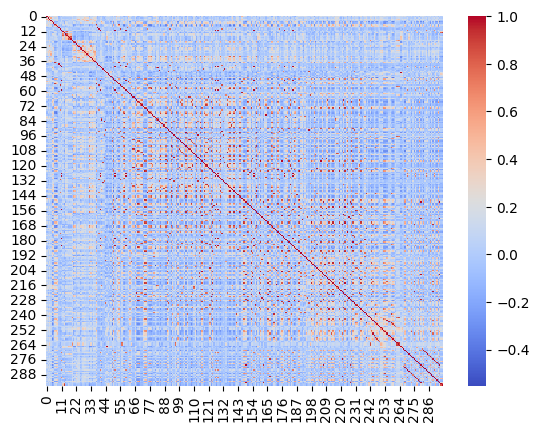

In [268]:
# Create a correlation matrix
X_corr = pd.DataFrame(X)
corr_matrix = X_corr.corr()

# Print the correlation matrix
corr_matrix
sns.heatmap(corr_matrix, cmap='coolwarm')

In [273]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_corrdel = X_corr.drop(to_drop, axis=1)
X_corrdel
X_corrdel.to_csv('data/Xdata_correlationdropped_7546x168.csv')


In [299]:
X_train, X_test, y_train, y_test = train_test_split(X_corrdel, Y, test_size=0.2,random_state=42)

In [301]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(168,)))
model.add(Dense(64, activation='relu',kernel_regularizer = regularizers.l2(0.05)))
model.add(Dense(1, activation='relu'))
model.compile(loss="mean_absolute_error", optimizer = 'adam',metrics=['mae'])

## Remove features using RFE

In [325]:
from scikeras.wrappers import KerasRegressor
from tensorflow.keras.optimizers import legacy

In [328]:
optimizer = legacy.RMSprop(learning_rate=0.01)
def create_model(n):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(n,)))
    model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.05)))
    model.add(Dense(1, activation='relu'))
    model.compile(loss="mean_absolute_error", optimizer=optimizer, metrics=['mae'])
    return model

In [329]:
estimator = KerasRegressor(build_fn=create_model(168), epochs=50, batch_size=5, verbose=2)
rfe = RFE(estimator, n_features_to_select=64)
rfe.fit(X_corrdel, Y)

INFO:tensorflow:Assets written to: ram://5d1b08a6f715492996c2ab0ef72609c3/assets


INFO:tensorflow:Assets written to: ram://5d1b08a6f715492996c2ab0ef72609c3/assets
2023-07-18 22:09:57.137199: W tensorflow/core/util/tensor_slice_reader.cc:97] Could not open ram://f8b13c8139a64077aa57ed6827933204: INVALID_ARGUMENT: ram://f8b13c8139a64077aa57ed6827933204 is a directory.


AttributeError: 'RMSprop' object has no attribute 'build'

In [292]:
model.fit(X_train,y_train, epochs = 50, batch_size = 3)

Epoch 1/50
2012/2012 [==============================] - 1s 364us/step - loss: 1.6891 - mae: 1.2640
Epoch 2/50
2012/2012 [==============================] - 1s 373us/step - loss: 1.1626 - mae: 1.1135
Epoch 3/50
2012/2012 [==============================] - 1s 362us/step - loss: 1.1243 - mae: 1.0823
Epoch 4/50
2012/2012 [==============================] - 1s 377us/step - loss: 1.0806 - mae: 1.0421
Epoch 5/50
2012/2012 [==============================] - 1s 353us/step - loss: 1.0566 - mae: 1.0214
Epoch 6/50
2012/2012 [==============================] - 1s 351us/step - loss: 1.0305 - mae: 0.9963
Epoch 7/50
2012/2012 [==============================] - 1s 350us/step - loss: 1.0161 - mae: 0.9833
Epoch 8/50
2012/2012 [==============================] - 1s 350us/step - loss: 1.0092 - mae: 0.9769
Epoch 9/50
2012/2012 [==============================] - 1s 354us/step - loss: 0.9914 - mae: 0.9599
Epoch 10/50
2012/2012 [==============================] - 1s 350us/step - loss: 0.9800 - mae: 0.9498
Epoch 11/

In [293]:
y_pred = model.predict(X_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# print the test loss, test accuracy, and R-squared score
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
print('R-squared score:', r2)

48/48 [==============================] - 0s 349us/step - loss: 0.9995 - mae: 0.9723
Test loss: 0.9994876384735107
Test accuracy: 0.9723007678985596
R-squared score: 0.3202012290724764


In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
model = Sequential()
model.add(Dense(256, activation='linear', input_shape=(456,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='sigmoid'))
model.add(Dense(1, activation='relu'))
model.compile(loss="mean_absolute_error", optimizer = 'adam',metrics=['mae'])

In [195]:
def createmodel_mae_Xtrain(n1,n2,epochs,batch_size):
    model = Sequential()
    model.add(Dense(n1, activation='relu', input_shape=(456,)))
    model.add(Dense(n2, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(loss="mean_absolute_error", optimizer = 'adam',metrics=['mae'])
    model.fit(X_train,y_train, epochs = epochs, batch_size = batch_size)

    return model

In [196]:
n1_list = [256,128,64]
n2_list = [128,64,32]
epochs_list = [50,100,150]
batch_size_list = [2,3,4]

In [197]:
model_result = []

In [199]:
i = -1
for n1 in n1_list:
    i += 1
    for n2 in n2_list[i:]:
        for epochs in epochs_list:
            for batch_size in batch_size_list:
                model = createmodel_mae_Xtrain(n1,n2,epochs,batch_size)
                train_loss, train_accuracy = model.evaluate(X_train, y_train)
                test_loss, test_accuracy = model.evaluate(X_test, y_test)
                r2 = r2_score(y_test, y_pred)
                model_result.append([n1,n2,epochs,batch_size,train_loss,test_loss,r2])
                print(model_result[-1])
                


Epoch 1/50
3018/3018 [==============================] - 2s 476us/step - loss: 1.2713 - mae: 1.2713
Epoch 2/50
3018/3018 [==============================] - 1s 486us/step - loss: 1.1394 - mae: 1.1394
Epoch 3/50
3018/3018 [==============================] - 1s 467us/step - loss: 1.0929 - mae: 1.0929
Epoch 4/50
3018/3018 [==============================] - 1s 468us/step - loss: 1.0543 - mae: 1.0543
Epoch 5/50
3018/3018 [==============================] - 1s 488us/step - loss: 1.0298 - mae: 1.0298
Epoch 6/50
3018/3018 [==============================] - 1s 484us/step - loss: 1.0064 - mae: 1.0064
Epoch 7/50
3018/3018 [==============================] - 1s 496us/step - loss: 0.9856 - mae: 0.9856
Epoch 8/50
3018/3018 [==============================] - 1s 496us/step - loss: 0.9744 - mae: 0.9744
Epoch 9/50
3018/3018 [==============================] - 1s 482us/step - loss: 0.9503 - mae: 0.9503
Epoch 10/50
3018/3018 [==============================] - 1s 485us/step - loss: 0.9456 - mae: 0.9456
Epoch 11/

In [200]:
df = pd.DataFrame(model_result,columns = ['# of Nodes 1','# of Nodes 2','Epochs','Batch size','Train loss','Test loss','r2'])

In [202]:
df.sort_values(by = ['Test loss'])

,# of Nodes 1,# of Nodes 2,Epochs,Batch size,Train loss,Test loss,r2
38,128,32,50,4,0.706238,0.948543,0.326738
5,256,128,100,4,0.617037,0.950188,0.326738
37,128,32,50,3,0.729849,0.951735,0.326738
3,256,128,100,2,0.669828,0.958641,0.326738
11,256,64,50,4,0.701154,0.962039,0.326738
13,256,64,100,3,0.661804,0.963445,0.326738
2,256,128,50,4,0.776946,0.963895,0.326738
40,128,32,100,3,0.659110,0.965680,0.326738
18,256,32,50,2,0.749346,0.968061,0.326738
23,256,32,100,4,0.620251,0.969154,0.326738


In [205]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(456,)))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))
model.compile(loss="mean_absolute_error", optimizer = 'adam',metrics=['mae'])
model.fit(X_train,y_train, epochs = 50, batch_size = 4)

Epoch 1/50
1509/1509 [==============================] - 1s 377us/step - loss: 1.2875 - mae: 1.2875
Epoch 2/50
1509/1509 [==============================] - 1s 395us/step - loss: 1.1018 - mae: 1.1018
Epoch 3/50
1509/1509 [==============================] - 1s 369us/step - loss: 1.0626 - mae: 1.0626
Epoch 4/50
1509/1509 [==============================] - 1s 368us/step - loss: 1.0476 - mae: 1.0476
Epoch 5/50
1509/1509 [==============================] - 1s 373us/step - loss: 1.0110 - mae: 1.0110
Epoch 6/50
1509/1509 [==============================] - 1s 368us/step - loss: 0.9865 - mae: 0.9865
Epoch 7/50
1509/1509 [==============================] - 1s 373us/step - loss: 0.9720 - mae: 0.9720
Epoch 8/50
1509/1509 [==============================] - 1s 369us/step - loss: 0.9486 - mae: 0.9486
Epoch 9/50
1509/1509 [==============================] - 1s 367us/step - loss: 0.9438 - mae: 0.9438
Epoch 10/50
1509/1509 [==============================] - 1s 370us/step - loss: 0.9322 - mae: 0.9322
Epoch 11/

In [206]:
y_pred = model.predict(X_test)
test_loss, test_accuracy = model.evaluate(X_test, y_test)
# calculate the R-squared score
r2 = r2_score(y_test, y_pred)

# print the test loss, test accuracy, and R-squared score
print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)
print('R-squared score:', r2)

48/48 [==============================] - 0s 379us/step - loss: 0.9757 - mae: 0.9757
Test loss: 0.975678026676178
Test accuracy: 0.975678026676178
R-squared score: 0.3249714588583682
